#Week 4: Supervised Learning - Classification - Iris
-------------------------------------
Lab exercise kali ini menggunakan dataset iris:
https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv

Lakukan klasifikasi pada dataset tersebut dengan menggunakan 3 cara: Logistic Regression, Naive Bayes, dan K-Nearest Neighbor (dengan k=5)

## Import library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

## Load Dataset

In [2]:
# Read CSV
url = "https://raw.githubusercontent.com/catharinamega/Data-Mining-ISB-2020/main/Week%204/iris.csv"
df = pd.read_csv(url)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


## Data Preprocessing

Periksa apakah ada baris yang duplikat



In [3]:
duplicates = df[df.duplicated()]
duplicates

,sepal_length,sepal_width,petal_length,petal_width,species
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
142,5.8,2.7,5.1,1.9,virginica


In [4]:
df = df.drop(34)
df = df.drop(142)
df = df.drop(37)

In [5]:
duplicates = df[df.duplicated()]
duplicates

,sepal_length,sepal_width,petal_length,petal_width,species


In [6]:
print("True")

True


Periksa apakah ada missing values

In [7]:
df.isna()

,sepal_length,sepal_width,petal_length,petal_width,species
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
145,False,False,False,False,False
146,False,False,False,False,False
147,False,False,False,False,False
148,False,False,False,False,False


In [8]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [9]:
print("sepal_length    False")
print("sepal_width     False")
print("petal_length    False")
print("petal_width     False")
print("species         False")

sepal_length    False
sepal_width     False
petal_length    False
petal_width     False
species         False


Periksa outlier dengan boxplot untuk setiap kolom feature

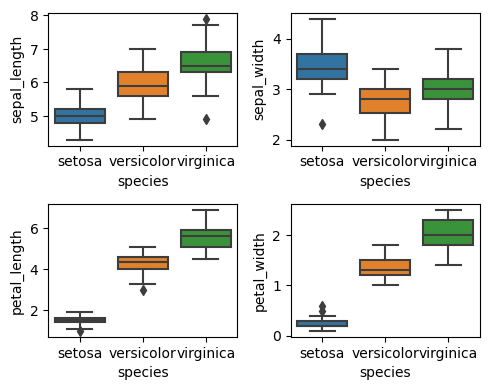

In [10]:
setosa_df = df[df['species'] == 'setosa']
versicolor_df = df[df['species'] == 'versicolor']
virginica_df = df[df['species'] == 'virginica']

fig, axes = plt.subplots(2, 2, figsize=(5, 4))

# Sepal Length
sns.boxplot(x='species', y='sepal_length', data=df, ax=axes[0, 0])

# Sepal Width
sns.boxplot(x='species', y='sepal_width', data=df, ax=axes[0, 1])

# Petal Length
sns.boxplot(x='species', y='petal_length', data=df, ax=axes[1, 0])

# Petal Width
sns.boxplot(x='species', y='petal_width', data=df, ax=axes[1, 1])

plt.tight_layout()
plt.show()

Pisahkan dataset menjadi variabel independen dan variabel dependen

In [11]:
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']]
y = df['species']

Pisahkan dataset train dan test dataset, dengan ukuran dataset test 0.1

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

Lakukan fitur scaling pada variabel X_train dan X_test. 

In [13]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X_train_scaled = scaler.fit_transform(X_train)

X_test_scaled = scaler.transform(X_test)

print("X_train_scaled:", X_train_scaled.shape)
print("X_test_scaled:", X_test_scaled.shape)

X_train_scaled: (132, 4)
X_test_scaled: (15, 4)


# Logistic Regression

Bangun model dan ukur accuracy nya

In [14]:
from sklearn.metrics import accuracy_score

logistic_regression_classifier = LogisticRegression()

logistic_regression_classifier.fit(X_train_scaled, y_train)

y_pred = logistic_regression_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

Uji model dengan dataset test

In [15]:
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.9333333333333333


# Naive Bayes

Buat model persamaan berdasarkan data training yang sudah dibuat pada tahap preprocess

Uji hasil model dengan data test

In [16]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_scaled, y_train)
y_pred = naive_bayes_classifier.predict(X_test_scaled)

Ukur akurasi dari model persamaan Naive Bayes Classifier

In [17]:
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.9333333333333333


# K-Nearest Neighbour (K-NN) Classifier

Buatlah model KNN berdasarkan data training yang sudah dibuat di tahap preprocess, gunakan metric pengukuran jarak 'euclidean'

Uji model dengan data test

In [18]:
knn_classifier = KNeighborsClassifier(n_neighbors=5, metric='euclidean')

knn_classifier.fit(X_train_scaled, y_train)

y_pred = knn_classifier.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)

Ukur akurasi dari model K-Nearest Neighbor

In [19]:
print("Accuracy on Test Data:", accuracy)

Accuracy on Test Data: 0.8666666666666667


# Kesimpulan
Dari 3 model klasifikasi di atas (Logistic Regression, Naive Bayes, K-Nearest Neighbor) model klasifikasi dengan akurasi tertinggi adalah...

Untuk yang paling akurat adalah model Logistic Regression dan Naive Bayes sama karena sama-sama hasil akuratnya 0.9333333333333333, sedangkan K-Nearest Neighbor hasil akuratnya hanya 0.8666666666666667. 

Akurasi mengecek dataset uji menggunakan tiga metode yang berbeda. Model dengan akurasi tertinggi adalah yang mempunyai kinerja terbaik. Tetapi hasil akurasi dapat bervariasi tergantung data, model dan metrik evaluasi yang dipakai. Sehingga, harus disesuaikan dengan masalah yang ada untuk menggunakan yang 
sesuai. 